## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap TCP full scan (aggressive)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [5]:
directory = '/home/user/notebooks/pcaps/nmap_tcp_full_scan_aggressive'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [7]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.102643
Name: time, dtype: float64

In [8]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [9]:
scan_times
#duration_list

0    0.102643
1    0.092787
2    0.107084
3    0.103172
4    0.068402
5    0.073113
6    0.089701
7    0.089056
8    0.068830
9    0.071376
Name: Scan times, dtype: float64

In [10]:
temp = pd.DataFrame(duration_list)

In [11]:
temp.mean()

0    0.086616
dtype: float64

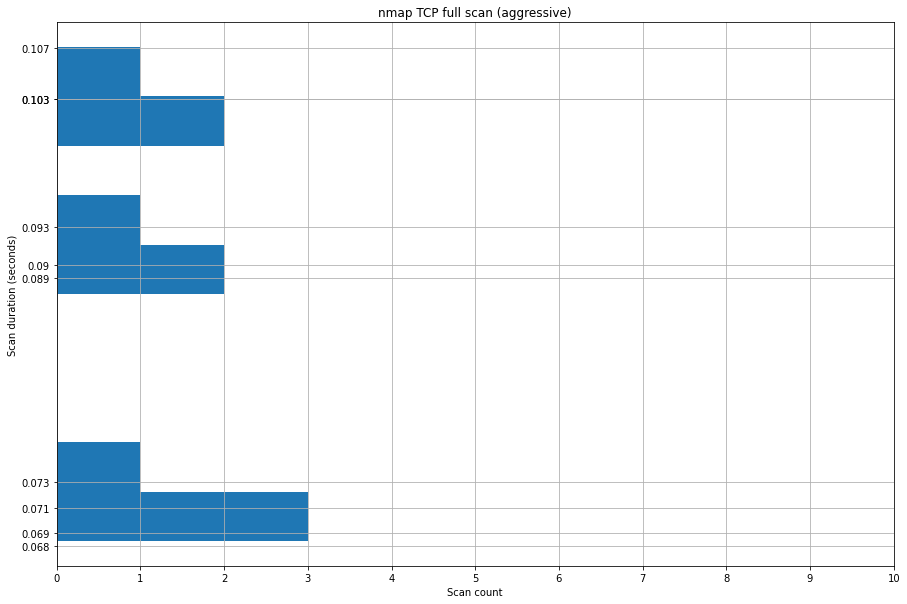

In [12]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [13]:
temp.describe()

0
count  10.000000
mean    0.086616
std     0.015152
min     0.068402
25%     0.071810
50%     0.089378
75%     0.100179
max     0.107084

## Packet count

In [14]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [15]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [16]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1732.3284149169922



## Order of ports scanned


In [17]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 45696 25
2 53900 110
3 34584 3306
4 33072 22
5 49112 53
6 53358 111
7 50034 445
8 54176 993
9 52524 139
10 46092 256
11 33278 135
12 36496 554
13 57896 143
14 53314 443
15 51514 995
16 42132 21
17 39730 1720
18 59242 199
19 42224 1025
20 55996 113
21 38096 3389
22 46476 5900
23 43474 8888
24 50610 8080
25 49154 80
26 40136 1723
27 49848 23
28 54330 587
29 39212 1055
30 53798 3659
31 35388 19350
32 51570 3390
33 41892 5800
34 58824 2191
35 49952 1301
36 35546 1130
37 41438 4446
38 53256 7000
39 38686 999
40 54988 617
41 33950 88
42 53220 30718
43 45746 1028
44 57660 20005
45 48158 19780
46 42900 1090
47 52740 3998
48 37644 4900
49 39164 5815
50 46236 3880
51 40338 3031
52 54416 49160
53 52410 32781
54 36944 1187
55 45062 1066
56 33850 2009
57 38998 524
58 51286 18101
59 53458 3030
60 51296 2099
61 49960 32774
62 43550 3300
63 52646 6129
64 50486 4279
65 50934 749
66 47976 1045
67 55634 6003
68 44224 1022
69 40048 1947
70 50304 32768
71 45702 9100
72 58494 1352
73 53808 1009
74 57178 2

580 47386 1001
581 36686 49159
582 58426 8083
583 36242 16993
584 37756 1048
585 53008 2040
586 43374 5222
587 44858 34573
588 45866 83
589 59986 42510
590 60056 3476
591 34754 1500
592 36082 55056
593 44490 9103
594 60540 1042
595 48498 1461
596 32898 7435
597 35544 44443
598 53212 25734
599 60942 1244
600 44424 1875
601 59154 2500
602 49362 7201
603 50954 32779
604 33838 44501
605 49772 2022
606 37752 2875
607 43650 1056
608 60514 49176
609 50242 82
610 33048 2260
611 34154 2035
612 34742 64623
613 49980 1501
614 56474 32773
615 49474 1011
616 51388 8652
617 57074 6543
618 58286 8222
619 38834 3001
620 56212 1061
621 49902 15003
622 33976 4662
623 37886 3493
624 44068 8200
625 59372 2607
626 38342 9081
627 36290 1071
628 42198 2065
629 53554 6668
630 56534 1096
631 44802 2301
632 42892 7911
633 36206 9502
634 34310 1641
635 37440 1064
636 50780 2967
637 45672 50636
638 41778 49167
639 54478 8500
640 39972 9999
641 57778 32785
642 38390 10617
643 51510 31337
644 54124 42
645 33284 658

579 54560 32775
580 48546 1247
581 32804 57797
582 56416 1038
583 43832 1311
584 41684 5080
585 37164 1027
586 39700 5001
587 33522 1046
588 51134 3011
589 41622 2809
590 41314 9200
591 42318 648
592 49772 8254
593 47970 1089
594 60368 1433
595 60254 6100
596 58800 3800
597 34580 7911
598 49932 1082
599 39860 2607
600 34906 465
601 35438 1094
602 35366 9943
603 57850 8088
604 33652 8007
605 47318 1840
606 54686 16012
607 46818 1783
608 37928 57294
609 55432 7627
610 38362 32782
611 42776 49153
612 57904 27000
613 52666 2009
614 36872 7999
615 41744 1119
616 39152 898
617 47252 7625
618 55050 3703
619 41984 1074
620 43928 10617
621 60306 1085
622 44118 12000
623 47460 28201
624 59880 5910
625 33396 1580
626 56960 5801
627 32908 8045
628 35970 10003
629 51298 32777
630 40642 1090
631 50700 912
632 43216 2401
633 47350 5500
634 45126 8291
635 42818 49159
636 47394 3369
637 51024 32778
638 50750 3324
639 44834 6002
640 43966 5440
641 43232 8084
642 60486 9900
643 53526 1141
644 56456 3809


579 36480 1122
580 39772 1287
581 32870 8800
582 51370 3551
583 41974 1026
584 39016 12000
585 55192 7106
586 42900 81
587 56070 2638
588 53642 1041
589 53846 2191
590 35106 648
591 34186 726
592 58398 13782
593 45008 10024
594 52548 254
595 40546 30
596 46336 27715
597 39040 3003
598 52014 765
599 53432 1687
600 49370 7676
601 47500 1300
602 48162 722
603 54412 7
604 58220 3300
605 57988 3493
606 52210 9968
607 50568 8081
608 35072 8181
609 52318 2001
610 47686 8200
611 49182 3001
612 36240 6881
613 59856 301
614 34284 5550
615 34438 1045
616 42886 4006
617 36668 6000
618 40074 7201
619 48486 1046
620 55582 26
621 39310 1097
622 55940 6566
623 34520 1024
624 49544 1124
625 51746 5915
626 45002 3827
627 54826 427
628 34866 8002
629 40882 3301
630 51712 18988
631 58808 5298
632 52748 2049
633 57078 4005
634 57176 1187
635 41772 1914
636 54714 60443
637 48564 5566
638 40144 1084
639 43256 3914
640 41466 31337
641 38566 7004
642 44042 3737
643 41002 5414
644 60164 9917
645 38104 8086
646 

154 56698 7937
155 40906 9618
156 59988 2020
157 43470 8007
158 35908 6566
159 36492 3690
160 40522 5102
161 54556 12000
162 41216 7921
163 50860 8100
164 42786 1092
165 58680 212
166 40102 2126
167 33376 20828
168 34458 48080
169 46092 8031
170 42480 2038
171 54596 49160
172 39964 2170
173 45472 8400
174 59424 9207
175 38746 1027
176 56598 1164
177 47040 2100
178 48878 32771
179 41696 2401
180 34514 5510
181 51240 4899
182 41272 808
183 36156 9091
184 44350 1417
185 48416 5060
186 57338 13
187 46226 5925
188 56916 1091
189 36524 25735
190 33266 5226
191 59168 3323
192 58126 705
193 47850 2008
194 46298 1023
195 59946 2013
196 43616 2200
197 41474 2007
198 35048 9898
199 50384 3809
200 39524 3918
201 43920 5859
202 49142 1039
203 34322 726
204 54980 10009
205 48580 1119
206 51544 32777
207 60242 6059
208 58322 32775
209 35144 1145
210 57800 5902
211 36998 9290
212 44180 1761
213 41062 3827
214 60782 24
215 38522 32778
216 38760 32781
217 54756 8002
218 39406 10082
219 58822 765
220 363

709 57294 6106
710 45466 7
711 55014 1234
712 54708 3
713 54990 9999
714 36762 1533
715 47880 7402
716 33234 32769
717 51652 1971
718 42558 8008
719 38278 4002
720 39442 4321
721 35802 5101
722 33612 5440
723 56574 55600
724 45688 7778
725 43052 2383
726 36402 5998
727 41594 10000
728 53412 5810
729 49788 125
730 44060 1044
731 34734 1500
732 58884 2106
733 37014 1524
734 34636 1151
735 35988 1287
736 44454 8099
737 36930 52848
738 45462 4443
739 54006 900
740 58546 1216
741 48736 144
742 43800 3703
743 55320 10621
744 58560 1213
745 34286 1087
746 34006 5822
747 55986 1097
748 37056 5100
749 38014 1721
750 35108 17877
751 38336 9594
752 38834 49154
753 34124 3476
754 60016 44501
755 56878 8045
756 50004 5922
757 49950 9500
758 39740 2043
759 43150 9220
760 34380 8652
761 51176 5200
762 33212 254
763 35908 1947
764 46600 6502
765 56790 2909
766 47126 1095
767 34552 1783
768 44728 10004
769 50294 497
770 38302 5030
771 38796 11967
772 44580 1147
773 37980 3945
774 47546 1840
775 54634 5

852 39364 5510
853 34564 9290
854 51890 1022
855 50164 5922
856 45650 10010
857 58348 3322
858 32816 32784
859 39290 2099
860 42508 3878
861 39326 9207
862 53684 981
863 47388 42510
864 45682 1137
865 47576 2004
866 54882 2045
867 36080 5560
868 58298 51493
869 44280 2920
870 60864 6839
871 39546 1123
872 36040 9040
873 32958 24444
874 43570 9877
875 50522 544
876 38298 9101
877 41526 1641
878 37440 1089
879 42514 2040
880 46992 6106
881 39496 407
882 39490 10243
883 48818 1352
884 33364 1031
885 52076 12174
886 53280 2000
887 40922 631
888 58008 7004
889 47878 4443
890 55610 52848
891 36430 11111
892 36596 7800
893 51520 51103
894 60054 10001
895 41814 10616
896 48286 2190
897 36344 7676
898 57590 5862
899 40034 5298
900 41720 1032
901 58242 10628
902 53284 4126
903 43890 12000
904 51846 5902
905 48566 4998
906 39510 8192
907 38000 85
908 40214 2006
909 41486 3527
910 34010 17
911 39644 6129
912 39678 6668
913 49178 3998
914 59572 1217
915 38010 2111
916 50518 8084
917 36168 49154
918

411 51270 5961
412 49638 1124
413 37180 5901
414 32822 3333
415 36576 2557
416 58894 9876
417 53040 5922
418 53828 3703
419 58536 2607
420 33974 6699
421 36950 4003
422 38014 5802
423 34884 1455
424 56258 7070
425 38834 1080
426 36844 8085
427 53970 2191
428 36428 27353
429 39218 1100
430 55762 255
431 42482 60020
432 38434 1198
433 36388 3889
434 53318 2021
435 56528 42510
436 49012 49175
437 56804 3659
438 40532 1082
439 37456 2968
440 57712 55055
441 43014 9200
442 47318 12174
443 58784 3871
444 46556 5432
445 46970 50003
446 42642 49153
447 48694 1272
448 39714 1501
449 46786 58080
450 34272 6007
451 41978 9110
452 41320 9102
453 39380 1073
454 39650 13722
455 33098 8652
456 34258 3476
457 46336 1023
458 44068 1078
459 53194 57797
460 49502 1029
461 60786 617
462 50154 7911
463 41368 54045
464 50248 2111
465 38040 4848
466 36758 30000
467 49204 8899
468 57636 3814
469 56358 714
470 41414 2701
471 57068 1062
472 51414 57294
473 38200 8086
474 47340 8100
475 57238 8651
476 55826 9010

10 58422 139
11 58736 445
12 35432 995
13 48258 80
14 33906 443
15 35398 1025
16 59062 8888
17 54418 53
18 36364 587
19 50406 3306
20 51748 993
21 32796 3389
22 49476 110
23 49482 199
24 56742 8080
25 38068 111
26 54806 21
27 41818 25
28 50040 554
29 52590 4343
30 50060 5815
31 58088 1032
32 58346 1443
33 56294 1050
34 45920 37
35 58446 2046
36 41266 3370
37 44652 1034
38 36050 9575
39 58020 1864
40 54098 7777
41 48496 24800
42 41518 1971
43 54466 56737
44 59208 1801
45 34570 11110
46 51936 340
47 38806 1145
48 39618 3351
49 34062 8651
50 45454 4006
51 60094 1087
52 48000 9535
53 52552 3000
54 60706 12000
55 37512 1417
56 50070 765
57 33630 1001
58 48082 1213
59 52318 1024
60 60750 8333
61 60544 1352
62 37124 4242
63 36148 9929
64 44876 1755
65 50446 541
66 35528 3003
67 57976 4001
68 40834 9071
69 39868 50000
70 44126 5862
71 49602 34572
72 51252 1165
73 53180 464
74 49160 1500
75 43154 32771
76 49636 1185
77 60742 1029
78 34020 2875
79 53078 15000
80 58612 5811
81 40666 3920
82 39670

578 51796 8443
579 32970 1687
580 36012 1062
581 48650 2038
582 41074 10082
583 53712 2800
584 36608 6346
585 41198 20828
586 35724 1972
587 45596 7007
588 45502 465
589 42254 1138
590 42530 58080
591 38090 6666
592 47024 5003
593 40088 1039
594 60446 2638
595 42598 32768
596 50450 406
597 58016 2121
598 44194 65129
599 59390 617
600 52590 691
601 46346 1434
602 50220 4004
603 52392 6000
604 49880 50389
605 46856 1287
606 53462 7200
607 39846 7002
608 60336 9081
609 57380 616
610 60902 10180
611 50248 999
612 38314 8402
613 34362 3269
614 58056 1066
615 43080 8011
616 45492 10000
617 39784 3476
618 55560 3017
619 40246 109
620 42048 8652
621 46518 5357
622 57642 32769
623 33534 5678
624 58962 1247
625 53914 8045
626 36412 1914
627 51222 1310
628 54700 5666
629 33130 1060
630 39954 19
631 39060 6156
632 56024 9200
633 51260 24
634 48374 9207
635 56296 64680
636 35170 8021
637 47822 5225
638 40850 17877
639 46542 5087
640 33556 6779
641 52000 49175
642 47266 1080
643 47246 2068
644 47778

175 60674 32779
176 40790 8400
177 47396 5910
178 34018 5432
179 44980 2002
180 46886 35500
181 49998 4242
182 51406 1083
183 59950 55056
184 54638 2190
185 54680 9103
186 40224 9009
187 36966 12265
188 46506 1077
189 53506 34572
190 38686 1096
191 39682 8193
192 46280 1027
193 50844 10628
194 57024 82
195 42472 85
196 60674 1455
197 46722 1007
198 41434 6001
199 46858 4998
200 60952 1065
201 43668 27715
202 48850 34573
203 50618 1044
204 40298 5550
205 37082 49163
206 38130 2323
207 56930 3517
208 49894 5901
209 40098 9943
210 43530 90
211 40300 32784
212 56700 64680
213 43800 7937
214 50298 49159
215 57652 2068
216 54604 2288
217 36656 5666
218 42284 50800
219 42502 161
220 58656 50003
221 53924 2045
222 45984 1311
223 45210 7921
224 58018 89
225 57244 15003
226 51718 9595
227 36698 16992
228 34318 9485
229 52684 1084
230 50832 6059
231 45986 898
232 45272 2135
233 42096 2144
234 36566 777
235 55628 5989
236 54730 4004
237 37202 1098
238 51000 27352
239 32790 5922
240 44868 1107
241 

741 41796 1009
742 57036 563
743 53658 8000
744 43146 2103
745 46624 2007
746 48374 28201
747 40356 5560
748 40540 9011
749 60422 56737
750 48826 700
751 41834 1088
752 36260 8022
753 51536 687
754 58454 3551
755 49620 1234
756 45788 1862
757 54280 3801
758 34670 389
759 46454 555
760 46986 30718
761 56276 1058
762 36700 5911
763 38576 10629
764 44152 2161
765 58920 2601
766 45500 32781
767 34984 301
768 35052 5730
769 44596 7911
770 55346 1149
771 41068 32774
772 50990 16080
773 50338 1066
774 47234 3737
775 52438 52869
776 57012 2043
777 37842 5102
778 55198 6779
779 57578 6580
780 59578 1087
781 44370 32773
782 44118 10000
783 53670 1972
784 42476 2869
785 55306 8089
786 41234 5903
787 53644 3690
788 46754 2126
789 53408 2393
790 57996 1069
791 59206 5030
792 33044 1056
793 44388 9099
794 57646 1984
795 43104 3370
796 46308 1090
797 58516 50002
798 45622 15000
799 44230 8009
800 53896 10003
801 42138 1296
802 46556 8090
803 54070 10001
804 56654 8031
805 47904 32768
806 56526 5003
8

744 46038 19101
745 36156 3476
746 35936 2020
747 60934 1098
748 40696 5960
749 52826 5859
750 59426 4004
751 55518 32778
752 58432 25735
753 47864 27356
754 33632 1688
755 56558 9090
756 53170 1138
757 33890 24
758 53952 9593
759 45062 16001
760 51290 4445
761 47382 100
762 36110 12345
763 51098 65129
764 44302 5802
765 44788 3784
766 42114 6580
767 48180 9207
768 48014 2003
769 59312 515
770 35900 32784
771 60944 5902
772 39520 1700
773 60130 10243
774 43220 3006
775 46218 30718
776 58146 8654
777 40858 44501
778 37578 9111
779 45360 49155
780 40026 5718
781 56800 1862
782 60090 2111
783 43652 8600
784 59098 1022
785 56238 163
786 46354 10001
787 39286 2126
788 35676 1247
789 58130 1080
790 43092 9968
791 47196 1301
792 43592 49152
793 49572 10621
794 51330 3971
795 49522 6565
796 37706 17877
797 38444 3828
798 51996 3580
799 44208 10628
800 49094 2119
801 59710 9917
802 44118 42
803 60262 44443
804 55850 6547
805 42042 16018
806 56424 8082
807 56222 1839
808 44034 9071
809 60794 508

390 49540 6389
391 48140 666
392 43884 1071
393 41002 2394
394 59548 2000
395 38892 4900
396 53910 5925
397 60738 54328
398 55904 1090
399 52858 3269
400 54604 6779
401 42430 7777
402 42514 5910
403 42468 4006
404 45298 1556
405 49984 9207
406 57248 40911
407 55420 5102
408 59284 18040
409 42508 81
410 37294 9666
411 44196 514
412 42228 545
413 41418 2041
414 36896 2968
415 50650 3325
416 54264 60443
417 60568 4321
418 54946 5226
419 40936 593
420 35194 1782
421 43498 783
422 45562 544
423 46958 808
424 57176 55055
425 34188 1111
426 33054 1186
427 53934 2106
428 44766 1098
429 34728 8181
430 57088 4242
431 53546 1761
432 40032 1082
433 52534 6005
434 53300 1755
435 47486 19
436 53768 1594
437 48158 1046
438 41230 9220
439 44520 27355
440 58786 4998
441 53360 2191
442 37828 32
443 49990 7001
444 60294 1580
445 53840 32771
446 34496 52848
447 58944 1077
448 57276 10001
449 40066 1719
450 37460 5560
451 46070 7103
452 35320 1322
453 60042 2135
454 39700 7201
455 56456 3995
456 50826 5961

In [18]:
orders_port

scannr  sport  dport
0          1  45696     25
1          2  53900    110
2          3  34584   3306
3          4  33072     22
4          5  49112     53
...      ...    ...    ...
9995     996  39286   5000
9996     997  37424   3580
9997     998  38100   3007
9998     999  59202   6668
9999    1000  59336   1494

[10000 rows x 3 columns]

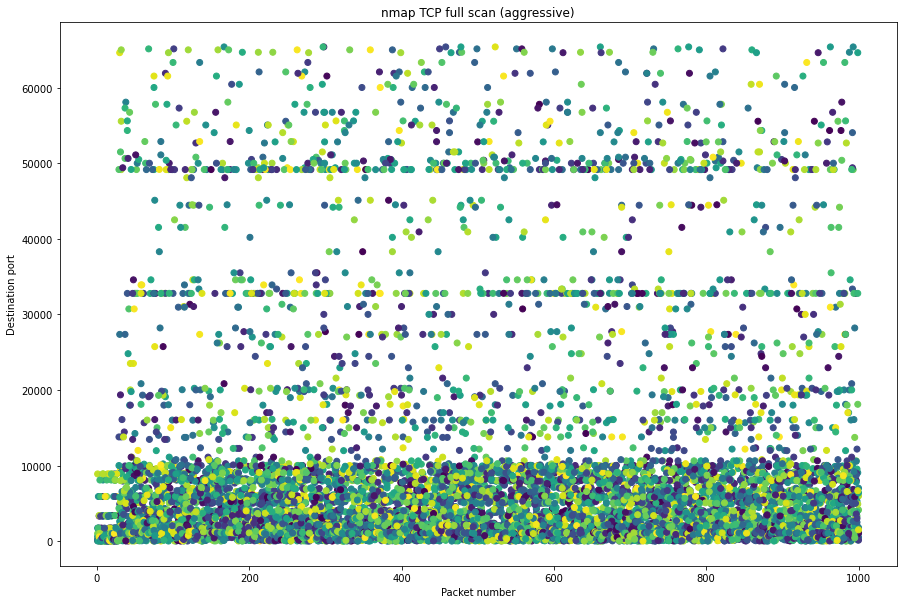

In [19]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [20]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [21]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

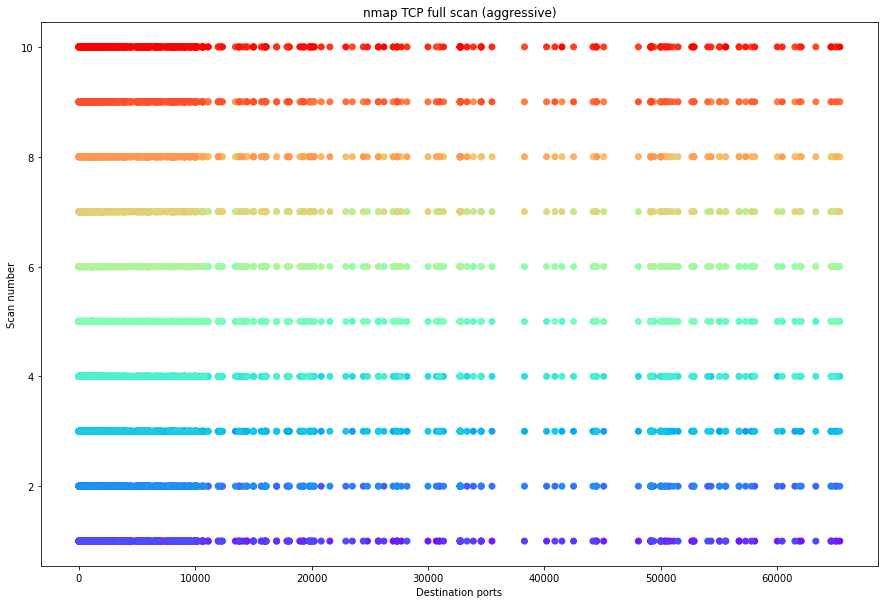

In [22]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [23]:
payloads.value_counts()

Series([], dtype: int64)

## IP-ID

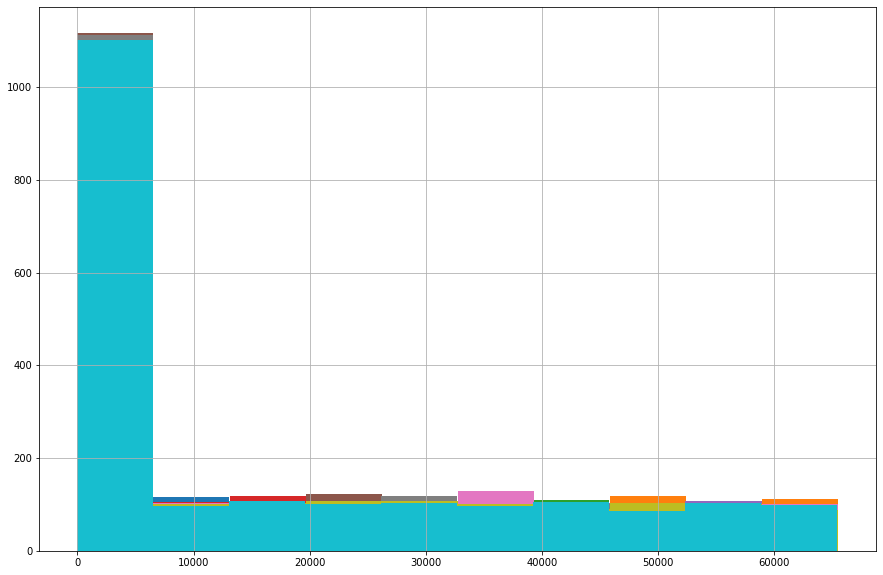

In [27]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

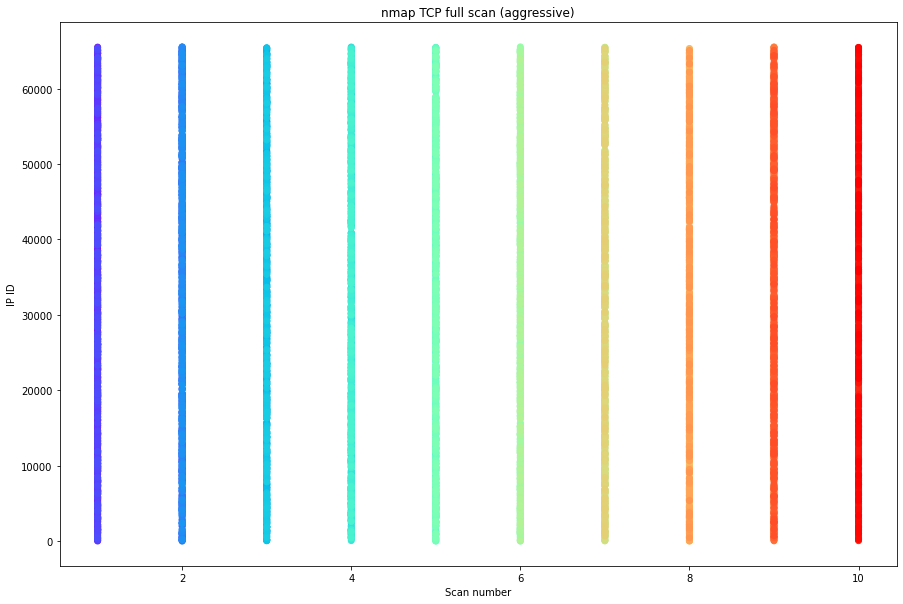

In [28]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()

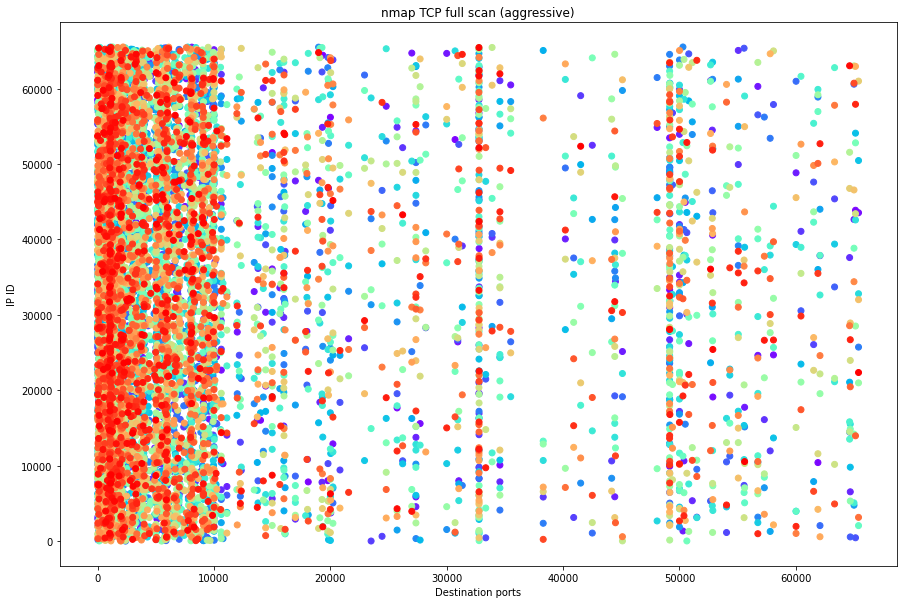

In [29]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

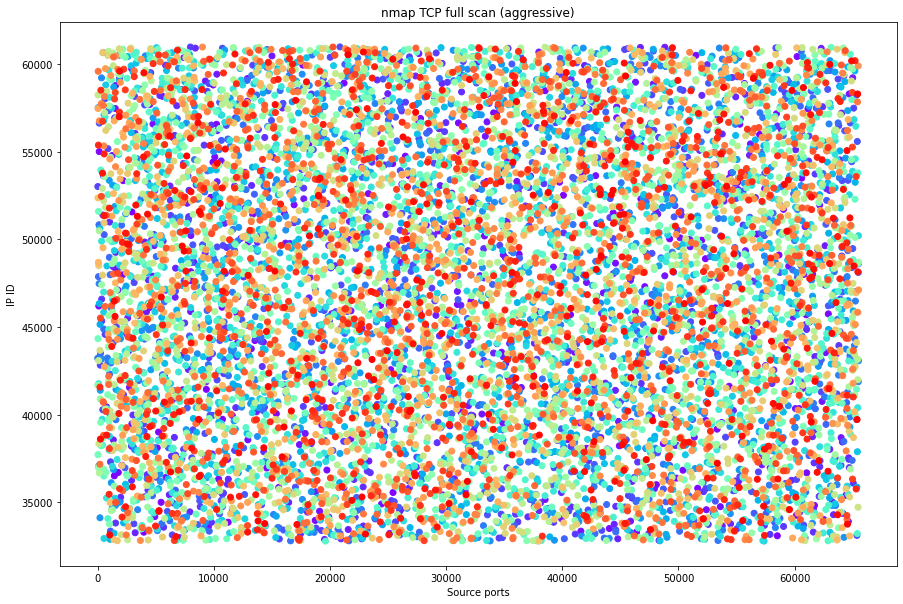

In [39]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [31]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

## TCP Window size

In [32]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

## Sequence number


In [33]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 652838235
Sequence number: 222310893
Sequence number: 468941645
Sequence number: 2949792840
Sequence number: 3652768055
Sequence number: 3931376340
Sequence number: 2937751386
Sequence number: 2849901684
Sequence number: 3799672886
Sequence number: 3487766013
Sequence number: 861222455
Sequence number: 1217233354
Sequence number: 2679167259
Sequence number: 443670228
Sequence number: 3153406537
Sequence number: 686973955
Sequence number: 4088666493
Sequence number: 720467775
Sequence number: 3325290378
Sequence number: 1963695832
Sequence number: 2405593110
Sequence number: 1717289662
Sequence number: 3468836559
Sequence number: 1107347090
Sequence number: 462180960
Sequence number: 1818286609
Sequence number: 3137458637
Sequence number: 923604237
Sequence number: 893959628
Sequence number: 4127697943
Sequence number: 3278730644
Sequence number: 1760527407
Sequence number: 1230581079
Sequence number: 1182817023
Sequence number: 3208405977
Sequence number: 4283374707
Se

Sequence number: 2807216509
Sequence number: 2993401998
Sequence number: 2571577772
Sequence number: 3660115599
Sequence number: 2046734633
Sequence number: 1644175865
Sequence number: 563321655
Sequence number: 424397189
Sequence number: 2938080090
Sequence number: 2390220505
Sequence number: 3504919341
Sequence number: 2497334288
Sequence number: 1425845337
Sequence number: 572539816
Sequence number: 3085722842
Sequence number: 762849101
Sequence number: 3536227133
Sequence number: 3059726796
Sequence number: 4260149723
Sequence number: 2438634778
Sequence number: 3131076519
Sequence number: 1900514032
Sequence number: 1623408841
Sequence number: 2515662536
Sequence number: 3807861868
Sequence number: 1474567703
Sequence number: 3339607154
Sequence number: 1797928548
Sequence number: 1746815027
Sequence number: 4061105681
Sequence number: 2409311835
Sequence number: 657737344
Sequence number: 1649980798
Sequence number: 2327376484
Sequence number: 1693472978
Sequence number: 41771145

Sequence number: 2267619429
Sequence number: 4037690830
Sequence number: 1359052717
Sequence number: 498537994
Sequence number: 175822922
Sequence number: 3399823972
Sequence number: 355144703
Sequence number: 749724630
Sequence number: 2613631199
Sequence number: 3714760296
Sequence number: 20379170
Sequence number: 1570360520
Sequence number: 2305007566
Sequence number: 2443529810
Sequence number: 4182639231
Sequence number: 2437968742
Sequence number: 3149401170
Sequence number: 3226155145
Sequence number: 3674395907
Sequence number: 1975906163
Sequence number: 2455618300
Sequence number: 3984847058
Sequence number: 4248608865
Sequence number: 2463927607
Sequence number: 905399293
Sequence number: 1954379495
Sequence number: 2768074380
Sequence number: 2979820233
Sequence number: 1736328401
Sequence number: 527039734
Sequence number: 2591099224
Sequence number: 1462695405
Sequence number: 2156619100
Sequence number: 361556343
Sequence number: 271951057
Sequence number: 3008393039
Se

Sequence number: 1676084759
Sequence number: 2026289807
Sequence number: 2614100999
Sequence number: 1033251163
Sequence number: 2308013911
Sequence number: 2894561692
Sequence number: 2705910187
Sequence number: 2444755856
Sequence number: 122433902
Sequence number: 1909921625
Sequence number: 476374668
Sequence number: 229520671
Sequence number: 1277983965
Sequence number: 869787020
Sequence number: 1024218715
Sequence number: 777295236
Sequence number: 3520390160
Sequence number: 3594051493
Sequence number: 2536275606
Sequence number: 2383385486
Sequence number: 1783877347
Sequence number: 2140517378
Sequence number: 2908470768
Sequence number: 2932011884
Sequence number: 4030671047
Sequence number: 3866530510
Sequence number: 3182809343
Sequence number: 2858003756
Sequence number: 1293619640
Sequence number: 2136951341
Sequence number: 786173475
Sequence number: 3606520475
Sequence number: 2605401087
Sequence number: 2871301060
Sequence number: 2813713022
Sequence number: 379016279

Sequence number: 1626534562
Sequence number: 3309824321
Sequence number: 3672484010
Sequence number: 1632578385
Sequence number: 2101666274
Sequence number: 4284270046
Sequence number: 3830704299
Sequence number: 3070773354
Sequence number: 269122571
Sequence number: 2700394549
Sequence number: 2316302342
Sequence number: 2074778539
Sequence number: 3003431740
Sequence number: 3856791417
Sequence number: 1847908299
Sequence number: 1161735926
Sequence number: 4165179273
Sequence number: 2637748785
Sequence number: 3690108824
Sequence number: 2531556500
Sequence number: 3948878073
Sequence number: 847380282
Sequence number: 832818245
Sequence number: 1782121904
Sequence number: 2268225798
Sequence number: 1629420512
Sequence number: 1361297185
Sequence number: 2697061079
Sequence number: 4250707943
Sequence number: 3437574026
Sequence number: 2685062750
Sequence number: 2180536928
Sequence number: 2190546268
Sequence number: 2073152421
Sequence number: 866861981
Sequence number: 4090975

Sequence number: 70007098
Sequence number: 2734832590
Sequence number: 1297251388
Sequence number: 3271167156
Sequence number: 3956605029
Sequence number: 314245076
Sequence number: 2367674264
Sequence number: 1374219380
Sequence number: 2195397908
Sequence number: 830240471
Sequence number: 2593983362
Sequence number: 638843476
Sequence number: 1186905717
Sequence number: 2648943460
Sequence number: 3005899653
Sequence number: 3221975370
Sequence number: 897280705
Sequence number: 2856681507
Sequence number: 3387060435
Sequence number: 4164579812
Sequence number: 3829886191
Sequence number: 1701774691
Sequence number: 2994051785
Sequence number: 1790290499
Sequence number: 1619264643
Sequence number: 2576686909
Sequence number: 4146925472
Sequence number: 2238100238
Sequence number: 2024627899
Sequence number: 4031566219
Sequence number: 80490953
Sequence number: 1215283350
Sequence number: 3912545281
Sequence number: 1115193198
Sequence number: 2744288572
Sequence number: 1792109843


Sequence number: 3944388617
Sequence number: 2269169415
Sequence number: 502570935
Sequence number: 3711289334
Sequence number: 1278373014
Sequence number: 2011928132
Sequence number: 3272273327
Sequence number: 345004488
Sequence number: 854126533
Sequence number: 151611829
Sequence number: 1256378249
Sequence number: 1593555152
Sequence number: 1185835075
Sequence number: 4272030273
Sequence number: 1167055602
Sequence number: 2563095361
Sequence number: 1633632693
Sequence number: 1883420186
Sequence number: 4153196547
Sequence number: 4151987366
Sequence number: 916374965
Sequence number: 2923517654
Sequence number: 1468357998
Sequence number: 1309905644
Sequence number: 1927137238
Sequence number: 4111905487
Sequence number: 1668477761
Sequence number: 1510059819
Sequence number: 538424679
Sequence number: 184309523
Sequence number: 2938863051
Sequence number: 1216407832
Sequence number: 561591718
Sequence number: 3519453845
Sequence number: 3978315351
Sequence number: 1113038348


Sequence number: 3941371356
Sequence number: 951869167
Sequence number: 2254714215
Sequence number: 1466196023
Sequence number: 2704881791
Sequence number: 2926239096
Sequence number: 3640039459
Sequence number: 1373726894
Sequence number: 3046285396
Sequence number: 695006537
Sequence number: 1063360365
Sequence number: 1131943750
Sequence number: 1230245077
Sequence number: 3117455879
Sequence number: 1256594631
Sequence number: 1107180064
Sequence number: 3815283489
Sequence number: 1941013292
Sequence number: 2757093824
Sequence number: 3538240831
Sequence number: 382088049
Sequence number: 764937459
Sequence number: 882885525
Sequence number: 2901484414
Sequence number: 789493286
Sequence number: 1587095496
Sequence number: 419003766
Sequence number: 2781130921
Sequence number: 1202214166
Sequence number: 854345127
Sequence number: 2532580624
Sequence number: 2277018084
Sequence number: 900215506
Sequence number: 981842205
Sequence number: 1414445189
Sequence number: 266275458
Seq

Sequence number: 2543480459
Sequence number: 221476999
Sequence number: 4008827321
Sequence number: 1283590342
Sequence number: 3785239838
Sequence number: 3030722633
Sequence number: 3113008596
Sequence number: 610798170
Sequence number: 3895119398
Sequence number: 1724153650
Sequence number: 1442015884
Sequence number: 2889371346
Sequence number: 524132911
Sequence number: 870042458
Sequence number: 952376649
Sequence number: 720048654
Sequence number: 4220436139
Sequence number: 2506815073
Sequence number: 492978375
Sequence number: 1278835806
Sequence number: 1096381854
Sequence number: 3655997444
Sequence number: 561077851
Sequence number: 2043682404
Sequence number: 3410469288
Sequence number: 597219760
Sequence number: 3054773676
Sequence number: 938929201
Sequence number: 2724565733
Sequence number: 538605267
Sequence number: 4240754883
Sequence number: 904995808
Sequence number: 2155826761
Sequence number: 1726124056
Sequence number: 1095555789
Sequence number: 3790932604
Sequ

Sequence number: 1282828859
Sequence number: 1592911689
Sequence number: 3825231534
Sequence number: 3463489444
Sequence number: 545154547
Sequence number: 3598245379
Sequence number: 122040680
Sequence number: 946943077
Sequence number: 3352745192
Sequence number: 300712365
Sequence number: 3479279333
Sequence number: 1228649033
Sequence number: 1731107067
Sequence number: 2347409469
Sequence number: 4252104208
Sequence number: 4188339721
Sequence number: 1803643459
Sequence number: 3210811698
Sequence number: 2243889313
Sequence number: 3172115100
Sequence number: 2175117647
Sequence number: 3786939824
Sequence number: 3110872510
Sequence number: 3776420632
Sequence number: 3216881554
Sequence number: 76481317
Sequence number: 4042117072
Sequence number: 3944097238
Sequence number: 943043587
Sequence number: 1079225340
Sequence number: 2732213431
Sequence number: 4228631486
Sequence number: 1322670384
Sequence number: 2152199628
Sequence number: 1343643735
Sequence number: 3241225832

Sequence number: 1266464612
Sequence number: 220101868
Sequence number: 3267044586
Sequence number: 2204948142
Sequence number: 1546010516
Sequence number: 1785838290
Sequence number: 2405208723
Sequence number: 2986378400
Sequence number: 3434821931
Sequence number: 2321521303
Sequence number: 1601075824
Sequence number: 703899468
Sequence number: 4070157598
Sequence number: 303788446
Sequence number: 4214980537
Sequence number: 1824020210
Sequence number: 3418970295
Sequence number: 3711983184
Sequence number: 332297389
Sequence number: 3401526596
Sequence number: 1474214083
Sequence number: 2114798659
Sequence number: 2547994625
Sequence number: 656025305
Sequence number: 3629155858
Sequence number: 3078241957
Sequence number: 3833839801
Sequence number: 3989954735
Sequence number: 1715485203
Sequence number: 548059190
Sequence number: 1263166972
Sequence number: 1983782072
Sequence number: 47012923
Sequence number: 1657475752
Sequence number: 3765623148
Sequence number: 771095932
S

Sequence number: 891873254
Sequence number: 3863758449
Sequence number: 420968866
Sequence number: 1588370407
Sequence number: 898904255
Sequence number: 1887111478
Sequence number: 89748636
Sequence number: 3827500467
Sequence number: 2486586612
Sequence number: 3315659921
Sequence number: 89456813
Sequence number: 1526708816
Sequence number: 1762752363
Sequence number: 1738824816
Sequence number: 872855511
Sequence number: 439267255
Sequence number: 1305581408
Sequence number: 4200063136
Sequence number: 3008571868
Sequence number: 2128034729
Sequence number: 3582688344
Sequence number: 4081415141
Sequence number: 2014056674
Sequence number: 3526470231
Sequence number: 1702795033
Sequence number: 3268792681
Sequence number: 1962963589
Sequence number: 2761135680
Sequence number: 420702608
Sequence number: 2160720496
Sequence number: 4246775816
Sequence number: 1327409255
Sequence number: 1408316138
Sequence number: 1868492042
Sequence number: 2815544673
Sequence number: 3252272713
Se

Sequence number: 2318669237
Sequence number: 3630827422
Sequence number: 3004197699
Sequence number: 2489782626
Sequence number: 2313750361
Sequence number: 2511910997
Sequence number: 3626197870
Sequence number: 3047200627
Sequence number: 2447931485
Sequence number: 1588129175
Sequence number: 2013211073
Sequence number: 2417910276
Sequence number: 14788742
Sequence number: 1328646923
Sequence number: 4068927253
Sequence number: 3210090529
Sequence number: 1566966184
Sequence number: 2645188326
Sequence number: 3539061730
Sequence number: 671529728
Sequence number: 1452016234
Sequence number: 1569700326
Sequence number: 4055469319
Sequence number: 1070015674
Sequence number: 4111220180
Sequence number: 759421488
Sequence number: 85862224
Sequence number: 3222779739
Sequence number: 1252968367
Sequence number: 2487102907
Sequence number: 2275019593
Sequence number: 2216425114
Sequence number: 3259865652
Sequence number: 2919612986
Sequence number: 219063776
Sequence number: 1692346915

Sequence number: 4223095782
Sequence number: 3108731985
Sequence number: 4195788538
Sequence number: 3773473952
Sequence number: 378293028
Sequence number: 47149677
Sequence number: 1391997041
Sequence number: 1856094952
Sequence number: 3293851578
Sequence number: 1171787885
Sequence number: 3970585946
Sequence number: 3222529422
Sequence number: 1250581905
Sequence number: 2262739247
Sequence number: 2180017767
Sequence number: 3972530994
Sequence number: 2371121552
Sequence number: 3088739449
Sequence number: 840855336
Sequence number: 2953877694
Sequence number: 2080141965
Sequence number: 2365210901
Sequence number: 3344885564
Sequence number: 3307740615
Sequence number: 485082319
Sequence number: 1770566928
Sequence number: 2784309622
Sequence number: 1606100760
Sequence number: 1526684431
Sequence number: 1496868121
Sequence number: 2248590788
Sequence number: 3456868108
Sequence number: 3747712236
Sequence number: 736084214
Sequence number: 3315933741
Sequence number: 302221256

Sequence number: 1054549413
Sequence number: 1816854083
Sequence number: 4030014296
Sequence number: 1184841487
Sequence number: 800977862
Sequence number: 3420086655
Sequence number: 1731164665
Sequence number: 1265418681
Sequence number: 1678708821
Sequence number: 326163676
Sequence number: 1558394611
Sequence number: 2962916275
Sequence number: 2424690606
Sequence number: 3063409686
Sequence number: 205536619
Sequence number: 3073625603
Sequence number: 2340484291
Sequence number: 482167828
Sequence number: 930659464
Sequence number: 1810354573
Sequence number: 840793058
Sequence number: 479749485
Sequence number: 3811768520
Sequence number: 3271333069
Sequence number: 3387940790
Sequence number: 349677355
Sequence number: 3688007064
Sequence number: 2368817526
Sequence number: 2860408900
Sequence number: 3887418183
Sequence number: 2626848745
Sequence number: 2885011152
Sequence number: 3205910336
Sequence number: 3352704948
Sequence number: 979825453
Sequence number: 2829475556
S

Sequence number: 3395347254
Sequence number: 326351230
Sequence number: 1731703875
Sequence number: 3571327104
Sequence number: 3735848012
Sequence number: 749570061
Sequence number: 2853468175
Sequence number: 825563419
Sequence number: 3636627327
Sequence number: 159023071
Sequence number: 1463695235
Sequence number: 2684314897
Sequence number: 3235691270
Sequence number: 348602699
Sequence number: 1707457190
Sequence number: 2544068490
Sequence number: 3101382250
Sequence number: 4182093394
Sequence number: 630831935
Sequence number: 4043701114
Sequence number: 2738740320
Sequence number: 986494849
Sequence number: 1317332867
Sequence number: 4147556161
Sequence number: 1835270757
Sequence number: 3899916795
Sequence number: 652643779
Sequence number: 2267530508
Sequence number: 3845755184
Sequence number: 1951197643
Sequence number: 357644297
Sequence number: 3171449158
Sequence number: 2044150885
Sequence number: 3873369137
Sequence number: 1361027011
Sequence number: 1061011516
S

Sequence number: 3703749070
Sequence number: 3352022444
Sequence number: 2072389054
Sequence number: 2129468874
Sequence number: 2179882543
Sequence number: 1828580518
Sequence number: 2539132198
Sequence number: 2959342003
Sequence number: 2420406002
Sequence number: 528464090
Sequence number: 2261163787
Sequence number: 232538708
Sequence number: 3739895144
Sequence number: 1564478928
Sequence number: 1350375444
Sequence number: 819828318
Sequence number: 4099170113
Sequence number: 1762825109
Sequence number: 3626157830
Sequence number: 3422023322
Sequence number: 3590300569
Sequence number: 614341061
Sequence number: 1827901326
Sequence number: 2740266212
Sequence number: 3949549154
Sequence number: 3170452056
Sequence number: 1069407392
Sequence number: 3114318398
Sequence number: 2502395838
Sequence number: 2791186049
Sequence number: 3924904569
Sequence number: 3026395532
Sequence number: 619354977
Sequence number: 3760444353
Sequence number: 27595616
Sequence number: 2860842278

Sequence number: 3608294463
Sequence number: 4123251809
Sequence number: 2326395682
Sequence number: 3373910006
Sequence number: 2955828805
Sequence number: 1203391927
Sequence number: 1905718097
Sequence number: 2050557905
Sequence number: 694390914
Sequence number: 2505180767
Sequence number: 2818360689
Sequence number: 1336269880
Sequence number: 443442595
Sequence number: 1105234825
Sequence number: 288267183
Sequence number: 3453892768
Sequence number: 2865695260
Sequence number: 1893365404
Sequence number: 1698801011
Sequence number: 4018896663
Sequence number: 835083993
Sequence number: 2382327695
Sequence number: 3893611344
Sequence number: 751375827
Sequence number: 1110825366
Sequence number: 2868311689
Sequence number: 463382762
Sequence number: 4152217325
Sequence number: 3824040107
Sequence number: 1736932150
Sequence number: 3446988927
Sequence number: 3477088170
Sequence number: 3598408434
Sequence number: 1366447686
Sequence number: 2804213367
Sequence number: 507036739

Sequence number: 3652739922
Sequence number: 810815496
Sequence number: 3525835030
Sequence number: 3592309086
Sequence number: 3008369749
Sequence number: 2007994896
Sequence number: 2070782999
Sequence number: 3205645094
Sequence number: 485937186
Sequence number: 3847422375
Sequence number: 363938882
Sequence number: 768413483
Sequence number: 3743792684
Sequence number: 509427572
Sequence number: 108691149
Sequence number: 3094817887
Sequence number: 68461424
Sequence number: 3348697962
Sequence number: 1606221129
Sequence number: 1315665097
Sequence number: 4023642651
Sequence number: 3270199736
Sequence number: 704779222
Sequence number: 2831391410
Sequence number: 1720723308
Sequence number: 2447792015
Sequence number: 1001568039
Sequence number: 2328864012
Sequence number: 3304661686
Sequence number: 4176943839
Sequence number: 1767772666
Sequence number: 1714803838
Sequence number: 1340777718
Sequence number: 3174104104
Sequence number: 3793018791
Sequence number: 2299665241
S

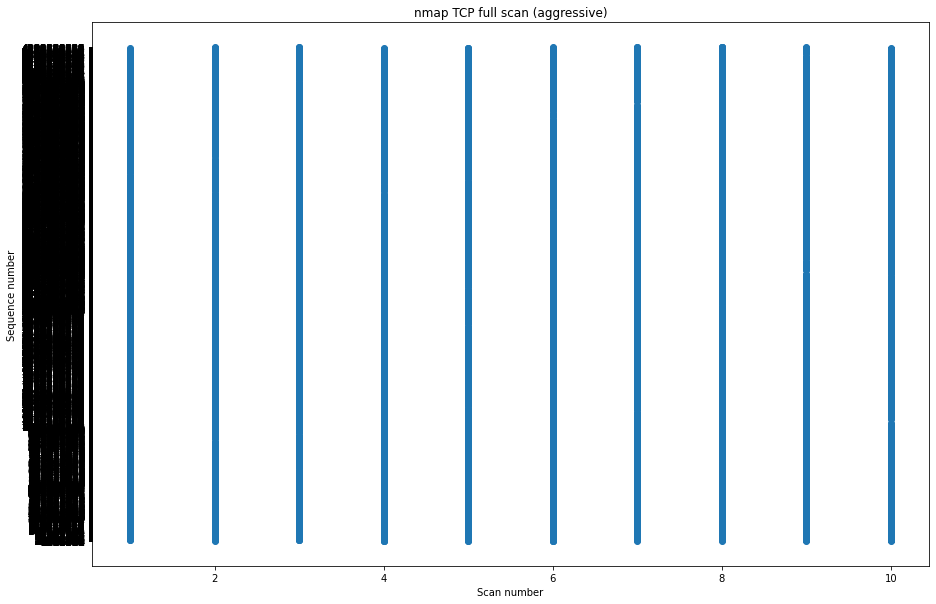

In [34]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


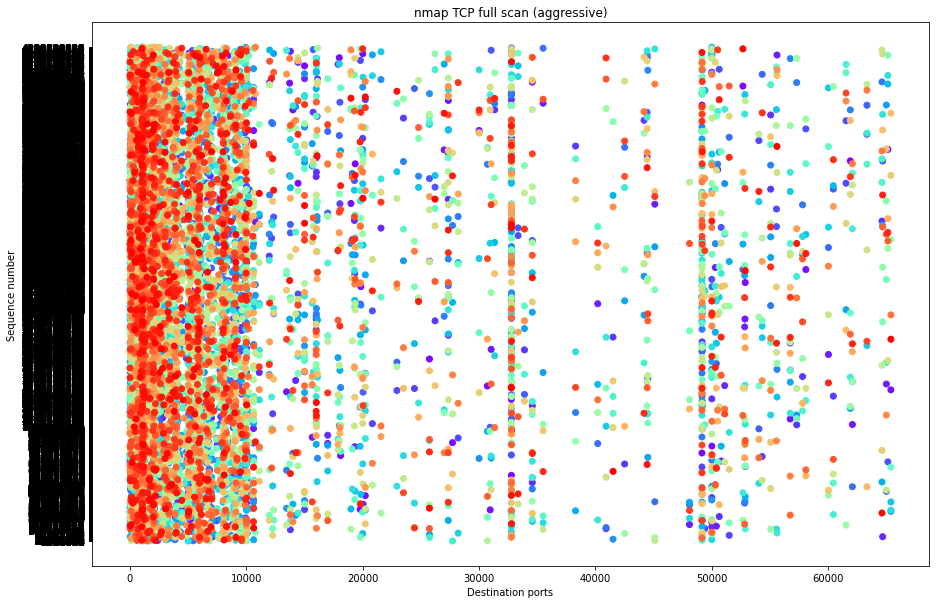

In [35]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

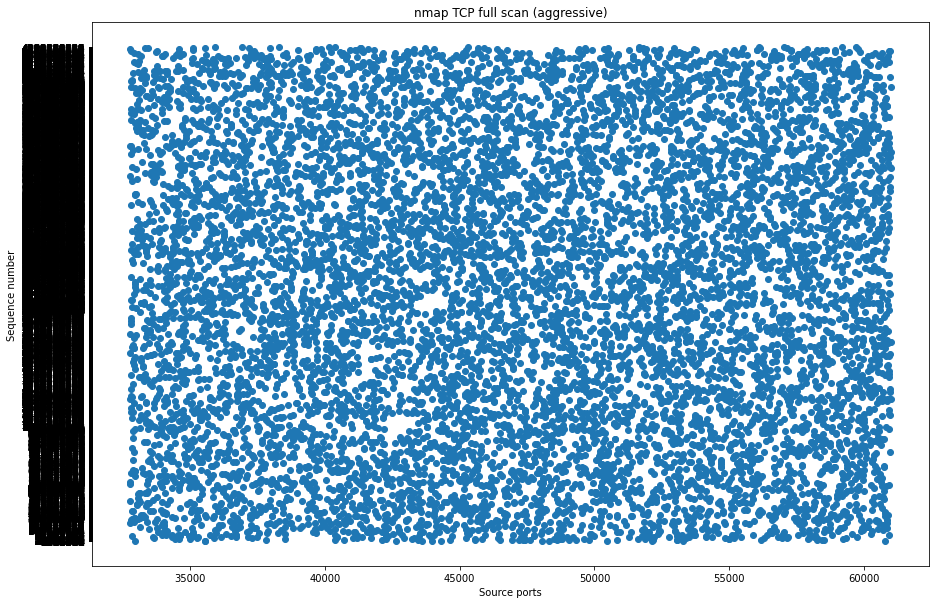

In [36]:
if src_ports:
    x = src_ports
    ys = sequences
    #colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [40]:
len(set(orders_port['sport']))

7122

## Flags

In [38]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F